<h1><span style="text-decoration: underline;"><span style="color: #000080;"><strong>Ballon Dor - Second Step --> Handling and EDA</strong></span></span></h1>

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# טעינת דאטה ופתיחתם

df_leauge = pd.read_csv("league_data.csv")
df_champions = pd.read_csv("champions_players_data.csv")
df_wiki= pd.read_csv("player_list_wiki.csv")

In [3]:
df_champions

,Unnamed: 0,Player,Season,Age,Squad,Lg_Rank,Comp,Matches,Starts,Minutes,Goals,Assists,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_game,assists_per_game
0,0,Lionel Messi,2004-2005,17,Barcelona,R16,1. Champions Lg,1,1,90,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,1,Lionel Messi,2005-2006,18,Barcelona,W,1. Champions Lg,6,4,322,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28
2,2,Lionel Messi,2006-2007,19,Barcelona,R16,1. Champions Lg,5,4,385,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00
3,3,Lionel Messi,2007-2008,20,Barcelona,SF,1. Champions Lg,9,9,728,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25
4,4,Lionel Messi,2008-2009,21,Barcelona,W,1. Champions Lg,12,10,927,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,1841,Carles Puyol,2009-2010,31,Barcelona,SF,1. Champions Lg,9,9,804,0.0,0.0,0.0,0.0,3.0,1.0,0.00,0.00
1842,1842,Carles Puyol,2010-2011,32,Barcelona,W,1. Champions Lg,8,7,632,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00
1843,1843,Carles Puyol,2011-2012,33,Barcelona,SF,1. Champions Lg,9,8,743,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00
1844,1844,Carles Puyol,2012-2013,34,Barcelona,SF,1. Champions Lg,4,3,269,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [4]:
df_leauge

,Unnamed: 0,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,Starts,Minutes,Goals,Assists,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_game,assists_per_game
0,0,Lionel Messi,2004-2005,17,FW,Barcelona,es ESP,1. La Liga,1st,7,0,70,1.0,0.0,0.0,0.0,0.0,0.0,1.29,0.00
1,1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1st,17,11,911,6.0,3.0,0.0,0.0,2.0,0.0,0.59,0.30
2,2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2nd,26,23,"1,983",14.0,3.0,0.0,0.0,2.0,0.0,0.64,0.14
3,3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3rd,27,23,"1,973",10.0,12.0,4.0,4.0,2.0,0.0,0.46,0.55
4,4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1st,31,27,"2,516",23.0,11.0,3.0,4.0,2.0,0.0,0.82,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2nd,10,7,620,4.0,0.0,0.0,0.0,1.0,0.0,0.58,0.00
2265,2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3rd,10,4,430,3.0,0.0,0.0,0.0,0.0,0.0,0.63,0.00
2266,2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9th,12,3,425,1.0,0.0,0.0,0.0,1.0,0.0,0.21,0.00
2267,2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10th,14,0,272,4.0,0.0,0.0,0.0,0.0,0.0,1.32,0.00


In [5]:
df_wiki

,Unnamed: 0,Rank,Player,Club(s),Season,Percent
0,0,1.0,Lionel Messi,Barcelona,2018-2019,24.360795454545457
1,1,2.0,Virgil van Dijk,Liverpool,2018-2019,24.11221590909091
2,2,3.0,Cristiano Ronaldo,Juventus,2018-2019,16.90340909090909
3,3,4.0,Sadio Mané,Liverpool,2018-2019,12.322443181818182
4,4,5.0,Mohamed Salah,Liverpool,2018-2019,6.3210227272727275
...,...,...,...,...,...,...
363,363,19th,Júlio César,Internazionale,2009-2010,0.22%
364,364,20th,Cesc Fàbregas,Arsenal,2009-2010,0.22%
365,365,21st,Miroslav Klose,Bayern Munich,2009-2010,0.19%
366,366,22nd,Philipp Lahm,Bayern Munich,2009-2010,0.05%


In [75]:
df_global = df_leauge.copy()

<h2><span style="text-decoration: underline; color: #000080;">Merge data sets:</span></h2>
<ul>
<li><span style="color: #000080;">Merged league and cups datasets</span></li>
<li><span style="color: #000080;">Unit ballon dor data from wikipedia dataset</span></li>
</ul>

In [76]:
# יצירת עמודות חדשות לשילוב הטבלאות

df_global["Lg_Rank_Cups"] = 0
df_global["Comp_Cups"] = 0
df_global["Matches_Cups"] = 0
df_global["Lg_Rank_Cups"] = 0
df_global["Starts_Cups"] = 0
df_global["Minutes_Cups"] = 0
df_global["Goals_Cups"] = 0
df_global["Assists_Cups"] = 0
df_global["penalty_kicks_made_Cups"] = 0
df_global["penalty_kicks_attempted_Cups"] = 0
df_global["yellow_cards_Cups"] = 0
df_global["red_cards_Cups"] = 0
df_global["goals_per_game_Cups"] = 0
df_global["assists_per_game_Cups"] = 0

In [81]:
# מיזוג טבלת צמפיונס עם טבלת הליגה יצירת גלובל דאטה
pd.options.mode.chained_assignment = None
for i in range(0,1846):
    name = df_champions['Player'][i]
    season = df_champions['Season'][i]
    for j in range(0,2268):
        if (name == df_global['Player'][j]) & (season == df_global['Season'][j]) & (df_champions['Comp'][i]!='Super Cup'):
            #print(j)
            df_global["Lg_Rank_Cups"][j] = df_champions['Lg_Rank'][i]
            df_global["Matches_Cups"][j] = df_champions['Matches'][i]
            df_global["Starts_Cups"][j] = df_champions['Starts'][i]
            df_global["Minutes_Cups"][j] = df_champions['Minutes'][i]
            df_global["Goals_Cups"][j] = df_champions['Goals'][i]
            df_global["Assists_Cups"][j] = df_champions['Assists'][i]
            df_global["penalty_kicks_made_Cups"][j] = df_champions['penalty_kicks_made'][i]
            df_global["penalty_kicks_attempted_Cups"][j] = df_champions['penalty_kicks_attempted'][i]
            df_global["yellow_cards_Cups"][j] = df_champions['yellow_cards'][i]
            df_global["red_cards_Cups"][j] = df_champions['red_cards'][i]
            go = df_champions['goals_per_game'][i]
            df_global["goals_per_game_Cups"][j] = go
            ass = df_champions['assists_per_game'][i]   
            df_global["assists_per_game_Cups"][j] = ass
            print(df_champions['assists_per_game'][i])
            #print(df_champions['assists_per_game'][i])
            df_global["Comp_Cups"][j] = df_champions['Comp'][i]

0.0
0.28
0.0
0.25
0.49
0.0
0.26
0.45
0.22
0.0
0.47
0.14
0.22
0.23
0.32
0.41
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.17
0.0
nan
0.0
0.36
0.0
0.38
0.18
0.18
0.2
0.35
0.29
0.08
0.45
0.34
0.32
0.45
0.15
0.24
0.13
0.25
0.38
0.19
0.08
0.29
0.25
0.28
0.0
0.0
0.0
0.0
0.13
0.13
0.0
0.24
0.39
0.17
0.25
0.21
2.65
0.0
0.41
0.41
0.64
0.69
0.6
3.0
4.0
4.0
1.0
1.0
nan
0.45
0.34
0.17
0.22
0.29
0.0
0.11
0.09
0.0
0.61
0.0
0.46
0.0
0.1
0.32
0.16
0.21
0.0
0.23
0.93
0.63
0.0
0.0
0.0
0.0
0.0
0.22
0.0
0.19
0.0
0.31
0.47
0.36
0.21
0.45
0.38
0.27
0.0
0.17
0.39
0.4
0.0
0.27
0.17
0.44
0.44
0.4
0.2
0.0
0.0
0.0
0.0
0.09
0.0
0.0
0.17
0.54
1.46
0.32
2.18
0.0
0.0
0.0
0.0
0.0
nan
0.19
0.0
0.37
0.34
0.0
0.33
0.0
0.42
0.16
0.0
0.5
0.2
0.18
0.0
0.0
0.19
0.68
0.13
0.43
0.0
0.0
0.0
0.08
0.17
0.34
0.43
0.37
0.0
0.0
0.11
0.11
0.2
0.15
0.51
0.0
0.0
0.29
0.0
0.13
0.0
0.0
0.19
0.0
0.0
0.19
0.29
0.42
0.5
0.0
0.5
0.35
0.15
0.71
0.71
0.0
0.0
0.0
0.1
0.49
0.41
2.0
4.0
3.0
3.0
0.0
0.0
1.0
1.0
3.0
3.0
1.0
1.0
4.0
3.0
1.0
0.0
0.0
0.0
0.0
0.0
0.

In [82]:
df_global

,Unnamed: 0,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,...,Starts_Cups,Minutes_Cups,Goals_Cups,Assists_Cups,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups
0,0,Lionel Messi,2004-2005,17,FW,Barcelona,es ESP,1. La Liga,1st,7,...,1,90,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1st,17,...,4,322,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28
2,2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2nd,26,...,4,385,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00
3,3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3rd,27,...,9,728,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25
4,4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1st,31,...,10,927,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2nd,10,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2265,2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3rd,10,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2266,2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9th,12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
2267,2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10th,14,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


In [83]:
df_global.to_csv("global_data.csv")

In [84]:
# יצרית שתי עמודות חדשות לפני המיזוג עם הדאטה מויקיפדיה

df_global["Ballon_D'or_Rank"] = 0
df_global["Ballon_D'or_Percentage_Of_Votes"] = 0
df_global

,Unnamed: 0,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,...,Goals_Cups,Assists_Cups,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes
0,0,Lionel Messi,2004-2005,17,FW,Barcelona,es ESP,1. La Liga,1st,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
1,1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1st,17,...,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28,0,0
2,2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2nd,26,...,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00,0,0
3,3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3rd,27,...,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25,0,0
4,4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1st,31,...,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2nd,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2265,2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3rd,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2266,2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9th,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2267,2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10th,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0


In [85]:
# אלגוריתם לאיחוד טבלאות וויקיפדיה לטבלה הכללית

pd.options.mode.chained_assignment = None
for i in range(0,2268):
    name = df_global['Player'][i]
    #print(name)
    season = df_global['Season'][i]
    #print(season)
    for j in range(0,362):
        if (name == df_wiki['Player'][j]) & (season == df_wiki['Season'][j]):
            #print(j)
            #print(df_wiki['Rank'][j])
            ra = df_wiki['Rank'][j]
            df_global["Ballon_D'or_Rank"][i] = ra
            pre = df_wiki['Percent'][j]
            #print(df_wiki['Percent'][j])
            df_global["Ballon_D'or_Percentage_Of_Votes"][i] = pre

In [86]:
df_global = df_global.drop(['Unnamed: 0'], axis = 1)
df_global

,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,Starts,...,Goals_Cups,Assists_Cups,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes
0,Lionel Messi,2004-2005,17,FW,Barcelona,es ESP,1. La Liga,1st,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1st,17,11,...,1.0,1.0,0.0,0.0,0.0,0.0,0.28,0.28,0,0
2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2nd,26,23,...,1.0,0.0,0.0,0.0,1.0,0.0,0.23,0.00,3.0,17.671517671517673
3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3rd,27,23,...,6.0,2.0,1.0,1.0,2.0,0.0,0.74,0.25,2.0,19.541029207232267
4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1st,31,27,...,9.0,5.0,0.0,0.0,1.0,0.0,0.87,0.49,1.0,32.84722222222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2nd,10,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3rd,10,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9th,12,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0
2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10th,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0


<h2><span style="text-decoration: underline; color: #000080;">Changing categorial columns to numeric and more:</span></h2>
<ul>
<li><span style="color: #000080;">astype to float or int</span></li>
<li><span style="color: #000080;">change lg_rank and lg_rank_cups to numeric</span></li>
<li><span style="color: #000080;">remove signs</span></li>
</ul>

In [87]:
df_global['Lg_Rank_Cups'].unique()

array(['R16', 'W', 'SF', 'QF', 0, 'GR', 'R32', 'F', 'Rd1', '1st', '2nd',
       'Rd4', 'Rd2', 'GR2', 'Rd3', '2S', 'GR1'], dtype=object)

In [88]:
# הפיכת עמודות רלוונטיות לנומריות

pd.options.mode.chained_assignment = None

j = 0
for k in range(0,2269):
    if type(df_global["Ballon_D'or_Rank"][k]) == str:
        df_global["Ballon_D'or_Rank"][k] = re.sub("[*rd|nd|sth|.]\w", "", df_global["Ballon_D'or_Rank"][k])
    if type(df_global["Ballon_D'or_Percentage_Of_Votes"][k]) == str: 
        df_global["Ballon_D'or_Percentage_Of_Votes"][k] =  re.sub("[%]", "", df_global["Ballon_D'or_Percentage_Of_Votes"][k])
    if type(df_global["Minutes"][k]) == str:  
        df_global["Minutes"][k] = re.sub("[,]", "", df_global["Minutes"][k])
    if type(df_global["Minutes_Cups"][k]) == str:  
        df_global["Minutes_Cups"][k] = re.sub("[,]", "", df_global["Minutes_Cups"][k])
    if type(df_global["Lg_Rank"][k]) == str:
        df_global["Lg_Rank"][k] = re.sub("[*rd|nd|sth|]", "", df_global["Lg_Rank"][k])
    if (df_global["Lg_Rank_Cups"][k]) == 'GR':
        if df_global['Comp_Cups'][k] == '2. Europa Lg':
            df_global['Lg_Rank_Cups'][k] = 48
        else:
            df_global['Lg_Rank_Cups'][k] = 24
             
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('W', 1)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('F', 2)    
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('SF', 4)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('QF', 8)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('R16', 16) 
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('R32', 32)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('GR1', 32)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('GR2', 16)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('1st', 1)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('2nd', 1)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('2S', 2)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('Rd1', 32)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('Rd2', 16)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('Rd3', 8)
df_global['Lg_Rank_Cups'] = df_global['Lg_Rank_Cups'].replace('Rd4', 4)

df_global["Ballon_D'or_Rank"] = df_global["Ballon_D'or_Rank"].astype(int)
df_global["Minutes_Cups"] = df_global["Minutes_Cups"].astype(float)
df_global["Minutes"] = df_global["Minutes"].astype(float)
df_global["Ballon_D'or_Percentage_Of_Votes"] = df_global["Ballon_D'or_Percentage_Of_Votes"].astype(float)
df_global["Ballon_D'or_Percentage_Of_Votes"] = round(df_global["Ballon_D'or_Percentage_Of_Votes"], 2)
df_global["Lg_Rank"] = df_global["Lg_Rank"].astype(int)

In [89]:
# הפיכת עמודת השנים לשתי עמודות נומריות

df_global['Start_Season'] = 0
df_global['End_Season'] = 0
j = 0
for i in df_global['Season']:
    year = int(i[0:4])
    df_global['Start_Season'][j] = year
    df_global['End_Season'][j] = (year+1)
    if year < 2005:
        df_global = df_global.drop([j])
    j = j+1   
df_global        

,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,Starts,...,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season
1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1,17,11,...,0.0,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006
2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2,26,23,...,0.0,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007
3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3,27,23,...,1.0,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008
4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1,31,27,...,0.0,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009
5,Lionel Messi,2009-2010,22,FW,Barcelona,es ESP,1. La Liga,1,35,30,...,0.0,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2,10,7,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2015,2016
2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3,10,4,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2016,2017
2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9,12,3,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2017,2018
2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10,14,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2018,2019


In [90]:
# יצירת דאטה קופי לשם חסכון בבלאגן
df_global_copy = df_global.copy()
df_global_copy

,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,Starts,...,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season
1,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1,17,11,...,0.0,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006
2,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2,26,23,...,0.0,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007
3,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3,27,23,...,1.0,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008
4,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1,31,27,...,0.0,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009
5,Lionel Messi,2009-2010,22,FW,Barcelona,es ESP,1. La Liga,1,35,30,...,0.0,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,Asamoah Gyan,2015,29,FW,Shanghai SIPG,cn CHN,1. Super League,2,10,7,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2015,2016
2265,Asamoah Gyan,2016,30,FW,Shanghai SIPG,cn CHN,1. Super League,3,10,4,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2016,2017
2266,Asamoah Gyan,2017-2018,31,FW,Kayserispor,tr TUR,1. Süper Lig,9,12,3,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2017,2018
2267,Asamoah Gyan,2018-2019,32,FW,Kayserispor,tr TUR,1. Süper Lig,10,14,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2018,2019


<h2><span style="text-decoration: underline; color: #000080;">Outliers handling:</span></h2>
<ul>
<li><span style="color: #000080;">Search outliers by visualization</span></li>
</ul>

In [91]:
# יצירת דאטה של עמודות נומריות
df_global_numeric = pd.DataFrame()
for col in df_global_copy.columns:
    if type(df_global_copy[col][1]) != str:
        df_global_numeric[col] = df_global_copy[col]
df_global_numeric

,Age,Lg_Rank,Matches,Starts,Minutes,Goals,Assists,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,...,penalty_kicks_made_Cups,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season
1,18,1,17,11,911.0,6.0,3.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006
2,19,2,26,23,1983.0,14.0,3.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007
3,20,3,27,23,1973.0,10.0,12.0,4.0,4.0,2.0,...,1.0,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008
4,21,1,31,27,2516.0,23.0,11.0,3.0,4.0,2.0,...,0.0,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009
5,22,1,35,30,2805.0,34.0,9.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,29,2,10,7,620.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2015,2016
2265,30,3,10,4,430.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2016,2017
2266,31,9,12,3,425.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2017,2018
2267,32,10,14,0,272.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0,0.00,2018,2019


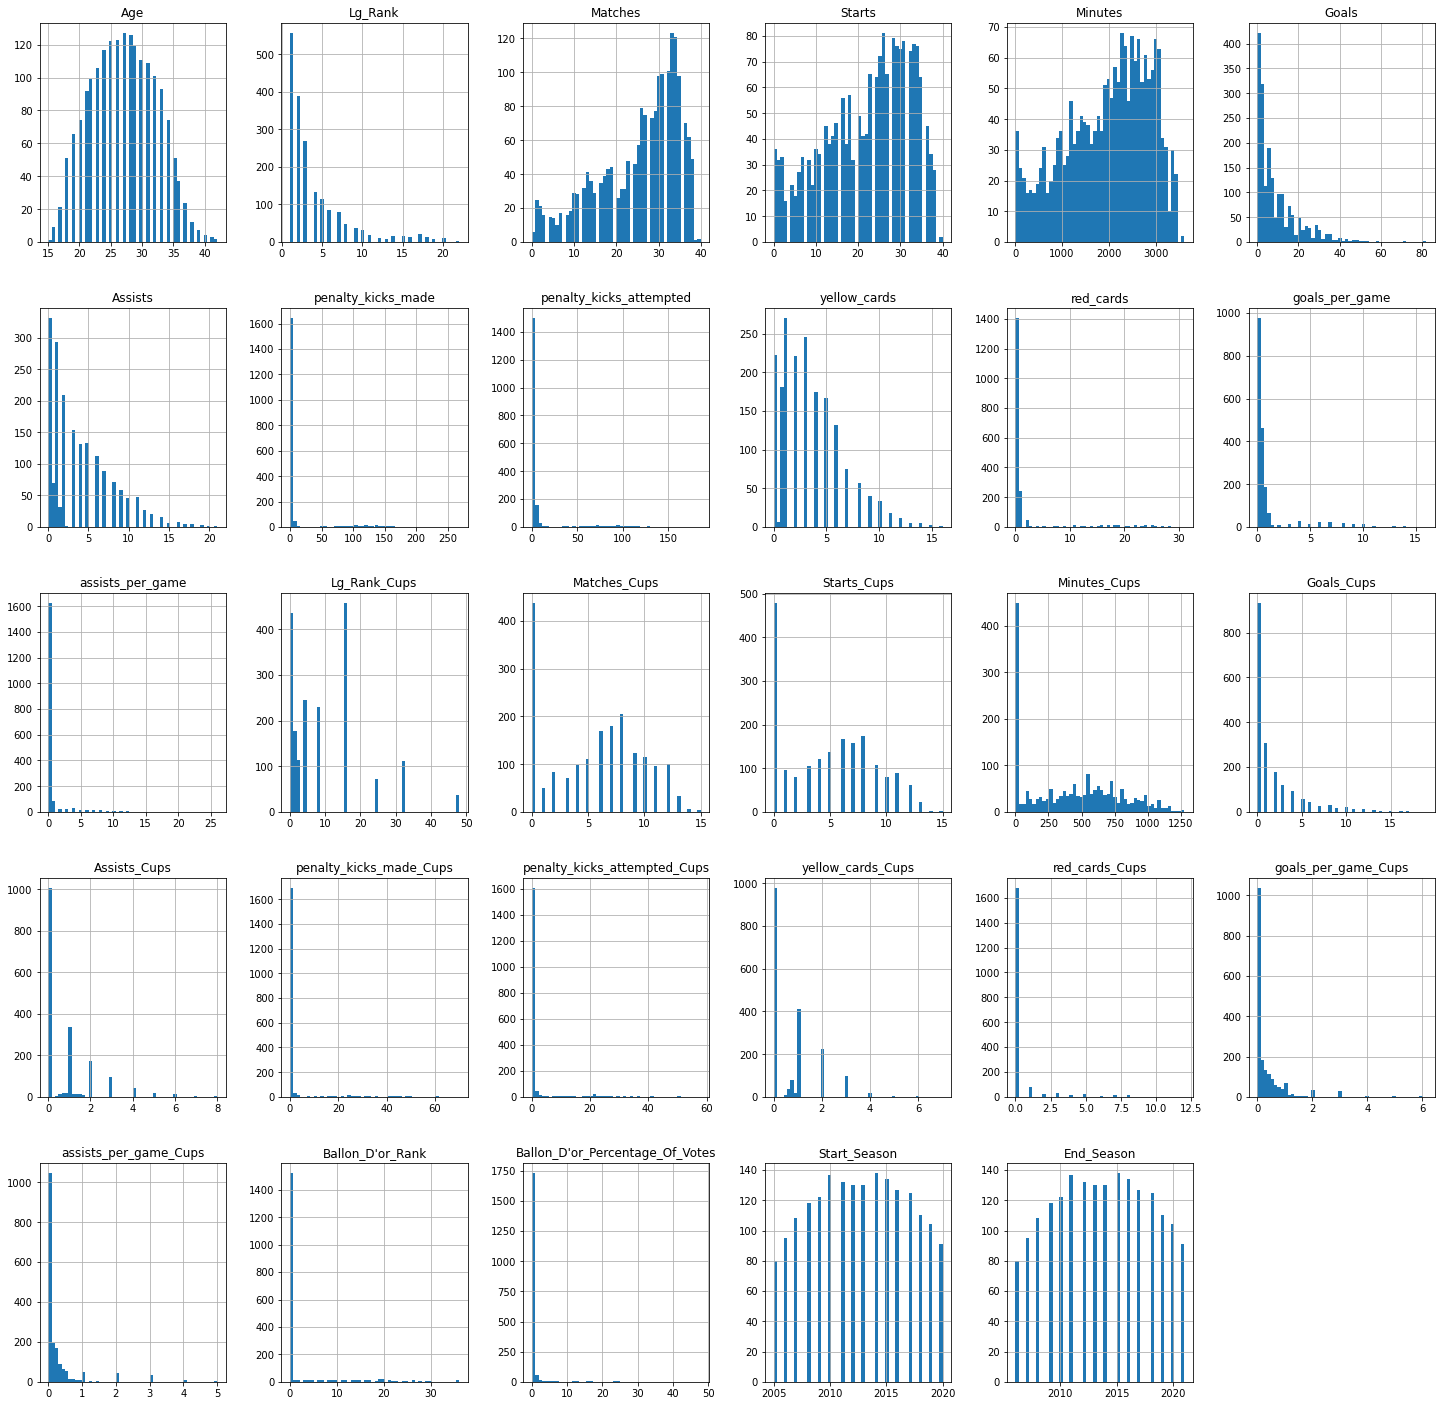

In [92]:
#מציאת חריגים באמצעות היסטוגרמות

ax_list = df_global_numeric.hist(bins=50, layout=(5,6), figsize=(25,25))

In [93]:
# בדיקת עמודות החשודות כחריגות
print(sum(df_global_copy['goals_per_game'] > 2))
print("------------------------")
print(sum(df_global_copy['penalty_kicks_made'] > 15))
print("------------------------")
print(sum(df_global_copy['red_cards'] > 5))
print("------------------------")
print(sum(df_global_copy['assists_per_game'] > 2))
print("------------------------")
print(sum(df_global_copy['Matches'] < 12))
print("------------------------")
print(sum(df_global_copy['Minutes'] < 900))
print("------------------------")

164
------------------------
179
------------------------
170
------------------------
147
------------------------
215
------------------------
280
------------------------


In [94]:
# מכניסים נאנ לכל המקומות הרצויים ולאחר מכאן מנקים באמצעות דרופ אנ ה
df_global_copy.penalty_kicks_made[df_global_copy.penalty_kicks_made>15] = np.nan
df_global_copy.Matches[df_global_copy.Matches < 15] = np.nan

In [96]:
df_global_copy = df_global_copy.dropna()
#df_global_copy

In [97]:
df_global_copy.to_csv("after_cleaning.csv")

In [99]:
df_global_copy['Comp'].describe()

In [100]:
df_global_copy['Comp'].unique()

In [101]:
# סידור עמודת האינדקס
df_global_copy = df_global_copy.reset_index()
df_global_copy = df_global_copy.drop(["index"], axis = 1)

In [102]:
# הפיכת הערך פריימרשיפ לפריימר ליג משום ששונה שם הליגה 
df_global_copy['Comp'] = df_global_copy['Comp'].replace('1. Premiership', '1. Premier League')

In [103]:
#df_global_copy['Comp'].unique()

In [104]:
# הוספת עמודה חדשה אשר אומרת לנו האם שחקן סיים בשלישייה הראשונה או לא
df_global_copy['Top_3'] = 0
for i in range(0,1302):
    if (df_global_copy["Ballon_D'or_Rank"][i] <= 3) & (df_global_copy["Ballon_D'or_Rank"][i] != 0):
        df_global_copy['Top_3'][i] = 1
df_global_copy         

,Player,Season,Age,Position,Squad,Country,Comp,Lg_Rank,Matches,Starts,...,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season,Top_3
0,Lionel Messi,2005-2006,18,FW,Barcelona,es ESP,1. La Liga,1,17.0,11,...,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006,0
1,Lionel Messi,2006-2007,19,FW,Barcelona,es ESP,1. La Liga,2,26.0,23,...,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007,1
2,Lionel Messi,2007-2008,20,FW,Barcelona,es ESP,1. La Liga,3,27.0,23,...,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008,1
3,Lionel Messi,2008-2009,21,FW,Barcelona,es ESP,1. La Liga,1,31.0,27,...,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009,1
4,Lionel Messi,2009-2010,22,FW,Barcelona,es ESP,1. La Liga,1,35.0,30,...,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,Asamoah Gyan,2005-2006,19,FW,Modena,it ITA,2. Serie B,5,25.0,11,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2005,2006,0
1300,Asamoah Gyan,2006-2007,20,FW,Udinese,it ITA,1. Serie A,10,25.0,18,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2006,2007,0
1301,Asamoah Gyan,2008-2009,22,FW,Rennes,fr FRA,1. Ligue 1,7,16.0,6,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2008,2009,0
1302,Asamoah Gyan,2009-2010,23,FW,Rennes,fr FRA,1. Ligue 1,9,29.0,27,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2009,2010,0


In [118]:
df_global_copy.to_csv("final_data_after_handling.csv")

In [106]:
# יצירת דאטה נומרי חדש
df_global_numeric2 = pd.DataFrame()
for col in df_global_copy.columns:
    if type(df_global_copy[col][1]) != str:
        df_global_numeric2[col] = df_global_copy[col]
df_global_numeric2

,Age,Lg_Rank,Matches,Starts,Minutes,Goals,Assists,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,...,penalty_kicks_attempted_Cups,yellow_cards_Cups,red_cards_Cups,goals_per_game_Cups,assists_per_game_Cups,Ballon_D'or_Rank,Ballon_D'or_Percentage_Of_Votes,Start_Season,End_Season,Top_3
0,18,1,17.0,11,911.0,6.0,3.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.28,0.28,0,0.00,2005,2006,0
1,19,2,26.0,23,1983.0,14.0,3.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.23,0.00,3,17.67,2006,2007,1
2,20,3,27.0,23,1973.0,10.0,12.0,4.0,4.0,2.0,...,1.0,2.0,0.0,0.74,0.25,2,19.54,2007,2008,1
3,21,1,31.0,27,2516.0,23.0,11.0,3.0,4.0,2.0,...,0.0,1.0,0.0,0.87,0.49,1,32.85,2008,2009,1
4,22,1,35.0,30,2805.0,34.0,9.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.73,0.00,1,22.65,2009,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19,5,25.0,11,1275.0,8.0,2.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2005,2006,0
1300,20,10,25.0,18,1556.0,8.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2006,2007,0
1301,22,7,16.0,6,619.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2008,2009,0
1302,23,9,29.0,27,2079.0,13.0,2.0,2.0,2.0,3.0,...,0.0,0.0,0.0,0.00,0.00,0,0.00,2009,2010,0


<h2><span style="text-decoration: underline; color: #000080;">Visualization:</span></h2>
<ul>


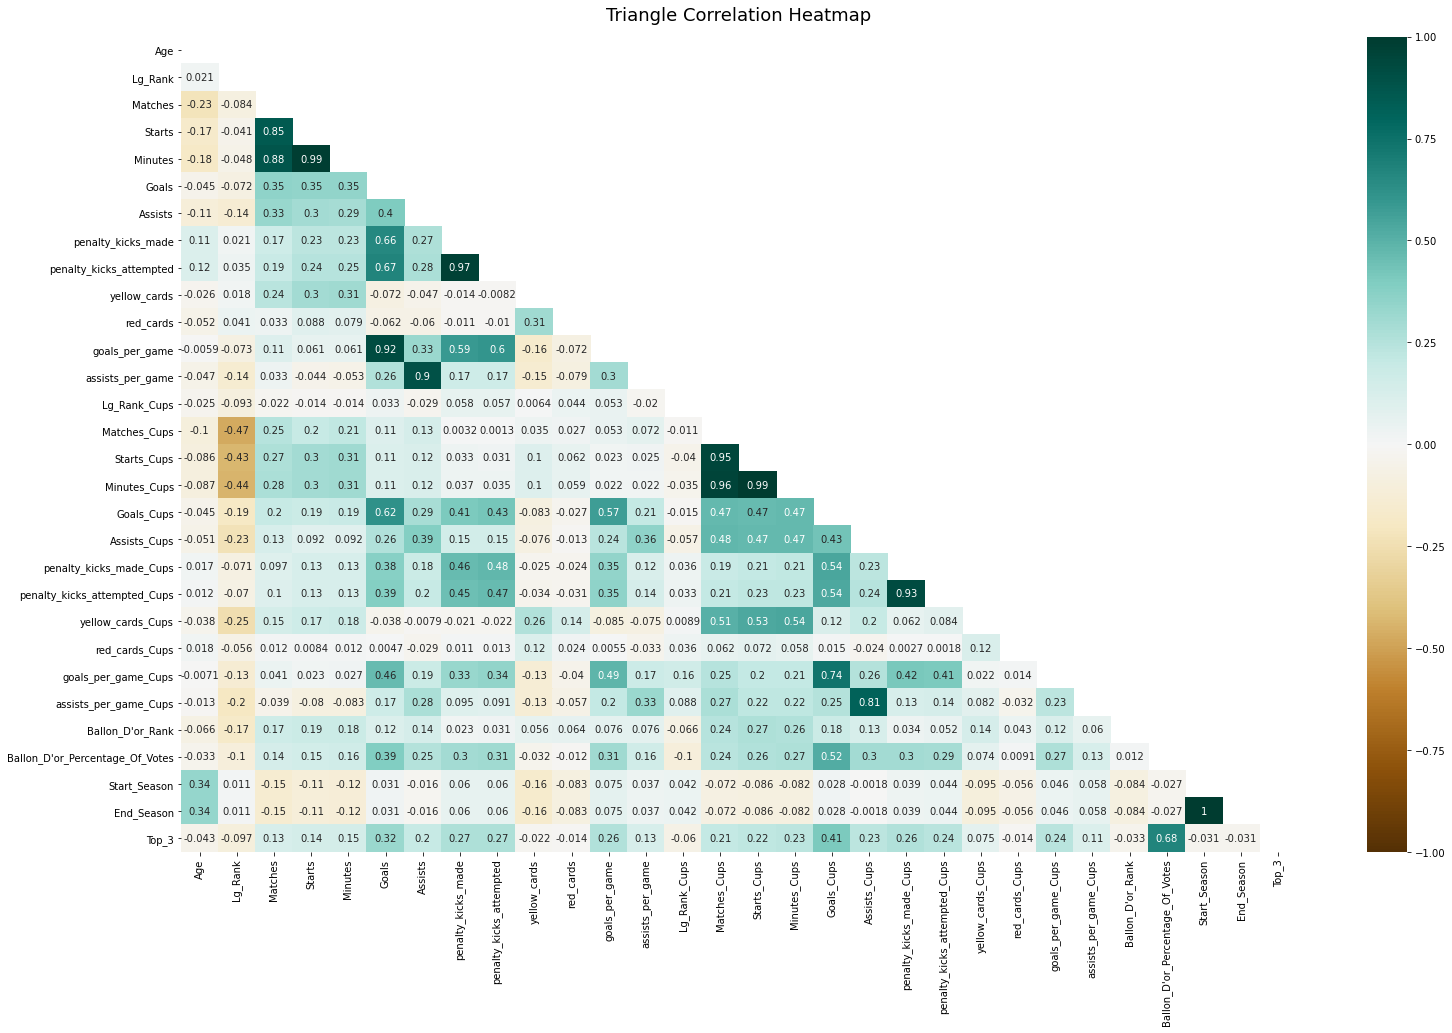

In [39]:
# הדפסת טבלת חום לפי קורולציה של המשתנים הנומריים
plt.figure(figsize=(25, 15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_global_numeric2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_global_numeric2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel="Ballon_D'or_Rank">

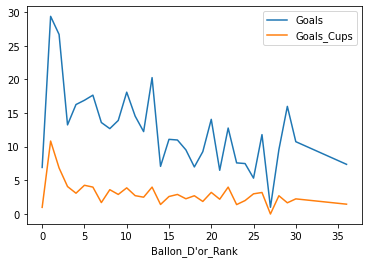

In [107]:
# טבלה שמראה כמה השפעה יש לגולים ולזכייה בכדטר הזהב
goals_plot = df_global_copy.groupby(["Ballon_D'or_Rank"]).mean()[['Goals','Goals_Cups']]
goals_plot.plot()  #kind=line can be skipped, since this is the default for the kind parameter

Text(0.5, 1.0, 'Number of players')

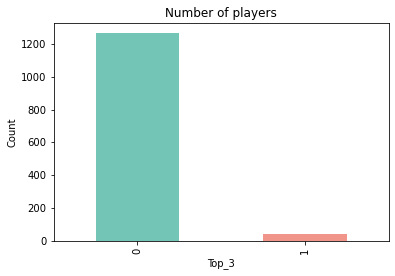

In [108]:
#בדיקת היחס בין השחקנים המופיעים בטבלה לבין השחקנים שגם היו בטופ 3
mycolors = ['#73C6B6', '#F1948A']

df_global_copy['Top_3'].value_counts().plot(kind='bar', color = mycolors)
plt.ylabel('Count')
plt.xlabel('Top_3')
plt.title('Number of players')

# kind='barh' -> for horizontal displaying

Text(0, 0.5, 'Frequency')

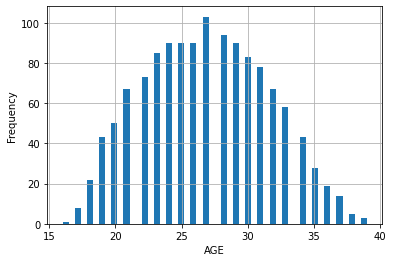

In [109]:
# היסטוגרת גילאים
df_global_copy.Age.hist(bins=50)
plt.xlabel('AGE')
plt.ylabel('Frequency')

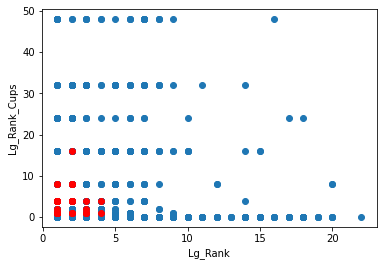

In [110]:
# סקאטר פלוט שמראה את הקשר בין המיקומים בליגה ובגביעים הבינלאומיים לבין הטופ 3 בכדור הזהב
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_global_copy.Lg_Rank, df_global_copy.Lg_Rank_Cups) #drawing all pokemons
plt.xlabel('Lg_Rank')
plt.ylabel('Lg_Rank_Cups')
ax.scatter(df_global_copy.Lg_Rank[df_global_copy.Top_3==1], df_global_copy.Lg_Rank_Cups[df_global_copy.Top_3==1], c='red') #drawing only is_legendary in red
plt.show()

Text(0.5, 1.0, 'Top_3 vs. normal Players')

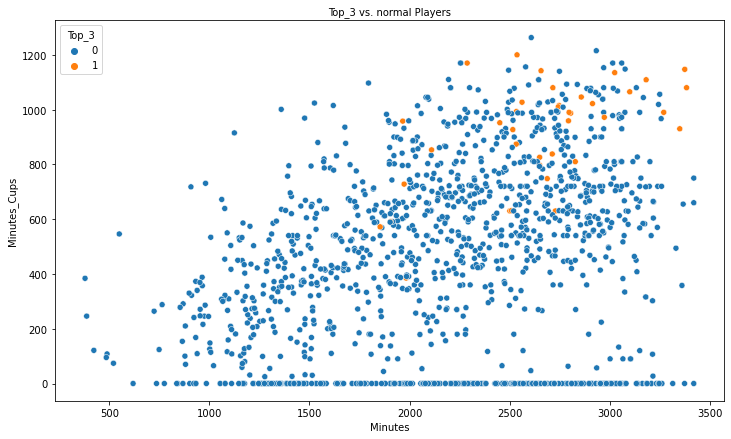

In [111]:
# סקאטר פלוט שמראה את הקשר בין דקות משחק לאורך השנה לבין הטופ 3 בתחרות
fig = plt.figure(figsize=(12, 7))
sns.scatterplot(x='Minutes', y='Minutes_Cups', hue='Top_3', data=df_global_copy)

plt.title("Top_3 vs. normal Players", fontsize=10)

<AxesSubplot:xlabel='Start_Season'>

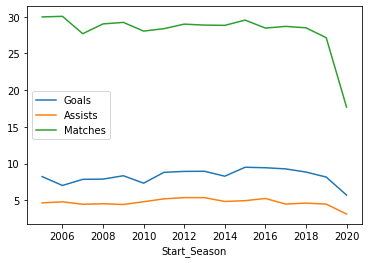

In [112]:
new_plot = df_global_copy.groupby(['Start_Season']).mean()[['Goals','Assists','Matches']]
new_plot.plot()

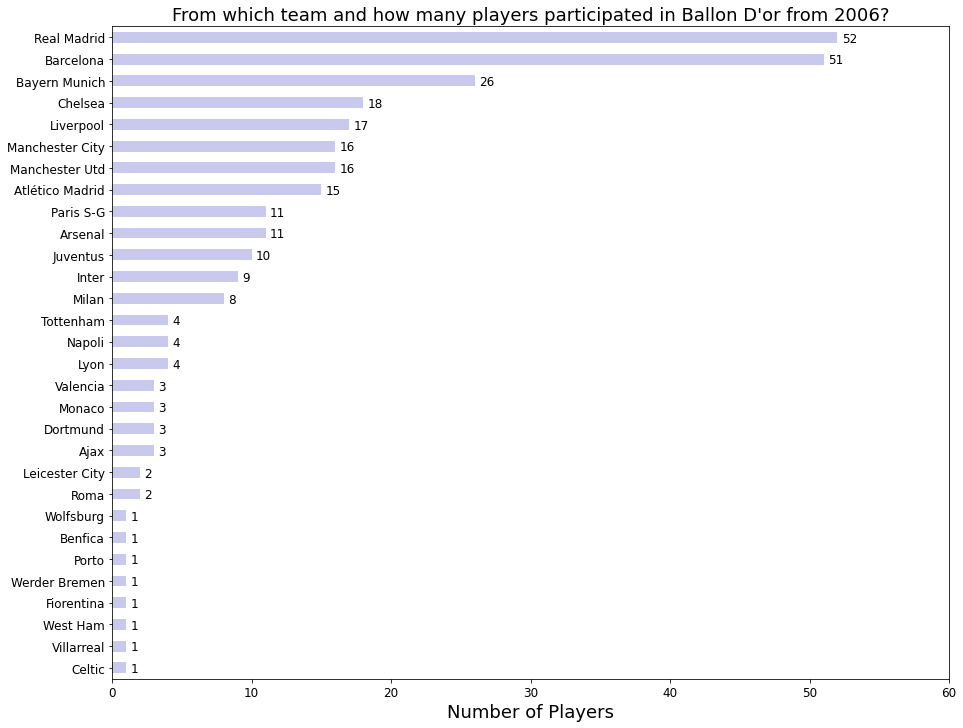

In [113]:


teams_df = df_global_copy.copy()
teams_df["Ballon_D'or_Rank"][teams_df["Ballon_D'or_Rank"] == 0] = np.nan
teams_df = teams_df.dropna()
teams = (teams_df['Squad'].value_counts())
teamsDF = pd.DataFrame(teams)


ax = teamsDF.plot(kind='barh', figsize=(15,12), color="#C9C9EE", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("From which team and how many players participated in Ballon D'or from 2006?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
ax.set_xticks([0, 10 ,20, 30, 40, 50, 60])
ax.set_xlim([0,60])

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='black',  fontsize=12)

    
ax.invert_yaxis()

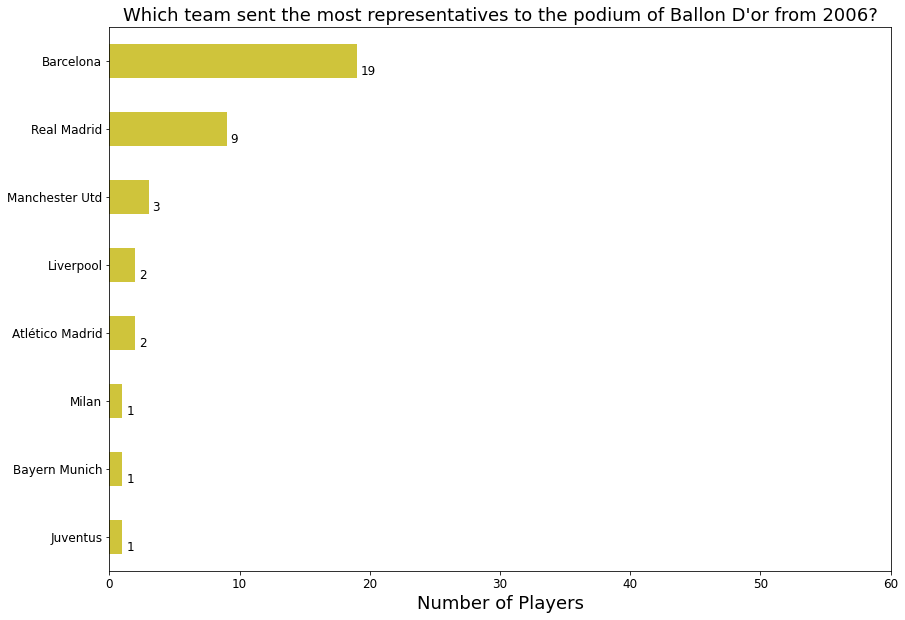

In [114]:
teams_df = df_global_copy.copy()
teams_df["Top_3"][teams_df["Top_3"] == 0] = np.nan
teams_df = teams_df.dropna()
teams = (teams_df['Squad'].value_counts())
teamsDF = pd.DataFrame(teams)


ax = teamsDF.plot(kind='barh', figsize=(14,10), color="#CFC43B", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which team sent the most representatives to the podium of Ballon D'or from 2006?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
ax.set_xticks([0, 10 ,20, 30, 40, 50, 60])
ax.set_xlim([0,60])

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='black',  fontsize=12)

    
ax.invert_yaxis()

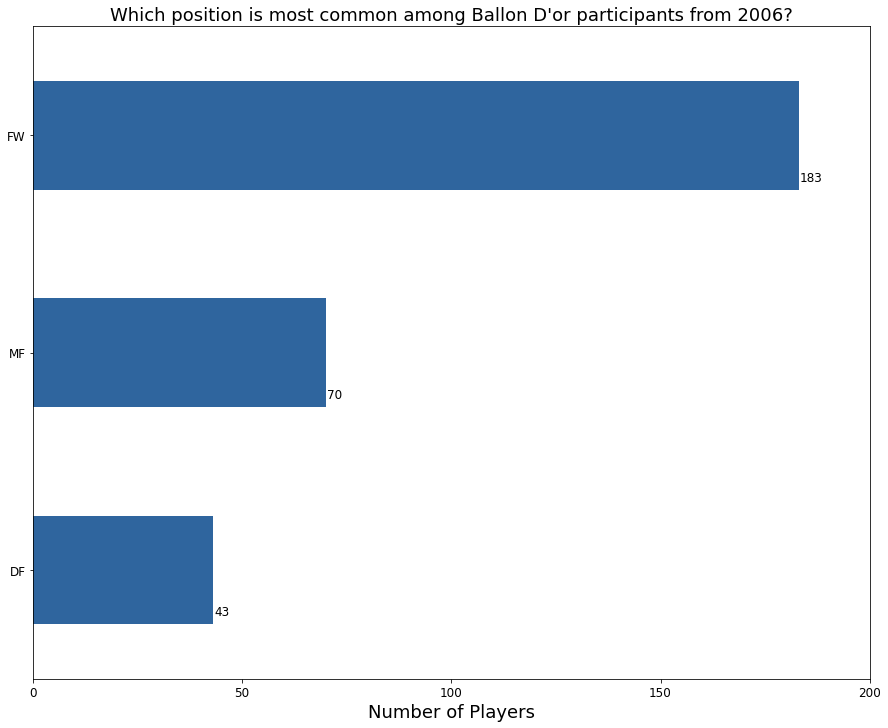

In [115]:
teams_df = df_global_copy.copy()
teams_df["Ballon_D'or_Rank"][teams_df["Ballon_D'or_Rank"] == 0] = np.nan
teams_df = teams_df.dropna()
teams = (teams_df['Position'].value_counts())
teamsDF = pd.DataFrame(teams)


ax = teamsDF.plot(kind='barh', figsize=(15,12), color="#2F659E", fontsize=12, legend=False);
ax.set_alpha(0.8)
ax.set_title("Which position is most common among Ballon D'or participants from 2006?", fontsize=18)
ax.set_xlabel("Number of Players", fontsize=18);
ax.set_xticks([0, 50, 100, 150, 200])
ax.set_xlim([0,200])

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width() +.3, i.get_y() +.46,i.get_width(),color='black',  fontsize=12)

    
ax.invert_yaxis()

In [117]:
for i in range(0,1304):
    if df_global_copy["Top_3"][i] == 1 and df_global_copy["Minutes"][i] < 2000:
        print(df_global_copy["Player"][i])
        print(df_global_copy["Minutes"][i])
        print(df_global_copy["Goals"][i])
        print(df_global_copy["Season"][i])
        print(df_global_copy["Position"][i])

Lionel Messi
1983.0
14.0
2006-2007
FW
Lionel Messi
1973.0
10.0
2007-2008
FW
Luka Modrić
1966.0
1.0
2017-2018
MF
Andrés Iniesta
1905.0
1.0
2009-2010
MF
Andrés Iniesta
1853.0
2.0
2011-2012
MF
